In [13]:
import numpy as np
import pandas as pd

In [14]:
movies_names = pd.read_csv("movies.csv")

In [15]:
movies_names.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [16]:
ratings_data = pd.read_csv("ratings.csv")

In [17]:
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [18]:
movies_data = pd.merge(ratings_data,movies_names,on='movieId')
movies_data.tail()

,userId,movieId,rating,timestamp,title,genres
99999,664,64997,2.5,1343761859,War of the Worlds (2005),Action|Sci-Fi
100000,664,72380,3.5,1344435977,"Box, The (2009)",Drama|Horror|Mystery|Sci-Fi|Thriller
100001,665,129,3.0,995232528,Pie in the Sky (1996),Comedy|Romance
100002,665,4736,1.0,1010197684,Summer Catch (2001),Comedy|Drama|Romance
100003,668,6425,1.0,993613478,"6th Man, The (Sixth Man, The) (1997)",Comedy


# **Criteria** 
1. Movies with the highest rating
2. Number of views


In [19]:
movies_data.groupby('title')['rating']


In [21]:
# group the data by the title 
# select the rating column,gets the ratings for each movie title grouped
# calculates the average rating for each movie
movies_data.groupby('title')['rating'].mean().head()  

title
"Great Performances" Cats (1998)           1.750000
$9.99 (2008)                               3.833333
'Hellboy': The Seeds of Creation (2004)    2.000000
'Neath the Arizona Skies (1934)            0.500000
'Round Midnight (1986)                     2.250000
Name: rating, dtype: float64

In [24]:
# sort in descending order of their average rating. 
# Then select top 10 of them

movies_data.groupby('title')['rating'].mean().sort_values(ascending=False).head(50)  

title
Ivan Vasilievich: Back to the Future (Ivan Vasilievich menyaet professiyu) (1973)    5.0
Alien Escape (1995)                                                                  5.0
Boiling Point (1993)                                                                 5.0
Bone Tomahawk (2015)                                                                 5.0
Borgman (2013)                                                                       5.0
Survive and Advance (2013)                                                           5.0
Supercop 2 (Project S) (Chao ji ji hua) (1993)                                       5.0
Last Dragon, The (1985)                                                              5.0
Boy Crazy (2009)                                                                     5.0
Brandon Teena Story, The (1998)                                                      5.0
Straight-Jacket (2004)                                                               5.0
Storefront Hitc

In [25]:
# add the average rating count to the table
movies_data[['title','rating']]

,title,rating
0,Dangerous Minds (1995),2.5
1,Dangerous Minds (1995),3.0
2,Dangerous Minds (1995),4.0
3,Dangerous Minds (1995),4.0
4,Dangerous Minds (1995),3.0
...,...,...
99999,War of the Worlds (2005),2.5
100000,"Box, The (2009)",3.5
100001,Pie in the Sky (1996),3.0
100002,Summer Catch (2001),1.0


In [27]:
# calculate the average ratings

# ratings_mean_count holds a DataFrame where each row corresponds to a movie title and its associated average rating

ratings_mean_count = pd.DataFrame(movies_data.groupby('title')['rating'].mean())

In [28]:
ratings_mean_count

,rating
title,
"""Great Performances"" Cats (1998)",1.750000
$9.99 (2008),3.833333
'Hellboy': The Seeds of Creation (2004),2.000000
'Neath the Arizona Skies (1934),0.500000
'Round Midnight (1986),2.250000
...,...
xXx (2002),2.478261
xXx: State of the Union (2005),1.000000
¡Three Amigos! (1986),3.258065


In [29]:
ratings_mean_count['rating_counts'] = pd.DataFrame(movies_data.groupby('title')['rating'].count())  

In [30]:
ratings_mean_count.head() 

,rating,rating_counts
title,,
"""Great Performances"" Cats (1998)",1.750000,2
$9.99 (2008),3.833333,3
'Hellboy': The Seeds of Creation (2004),2.000000,1
'Neath the Arizona Skies (1934),0.500000,1
'Round Midnight (1986),2.250000,2


In [31]:
ratings_mean_count['rating'] = round(ratings_mean_count['rating'],1)

In [32]:
ratings_mean_count.head() 

,rating,rating_counts
title,,
"""Great Performances"" Cats (1998)",1.8,2
$9.99 (2008),3.8,3
'Hellboy': The Seeds of Creation (2004),2.0,1
'Neath the Arizona Skies (1934),0.5,1
'Round Midnight (1986),2.2,2


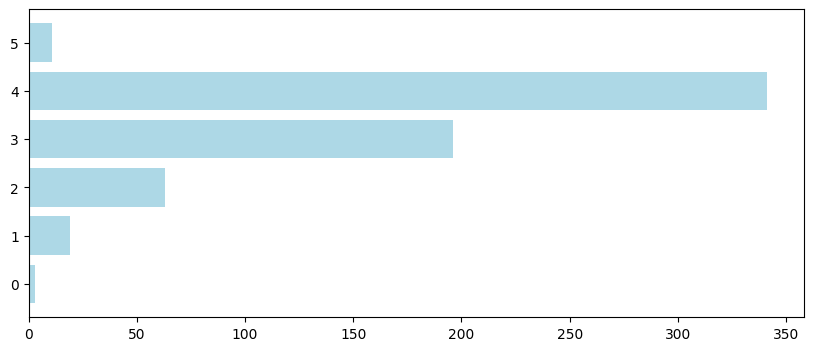

In [33]:
#plot rounded-up ratings with number of movies
import matplotlib.pyplot as plt

plt.figure(figsize =(10, 4))
ax=plt.barh(ratings_mean_count['rating'].round(),ratings_mean_count['rating_counts'],color='lightblue')
plt.show()


# barh -> horizontal bar chart
#  shows how popular movies are at different average rating levels, based on the number of ratings they've received.

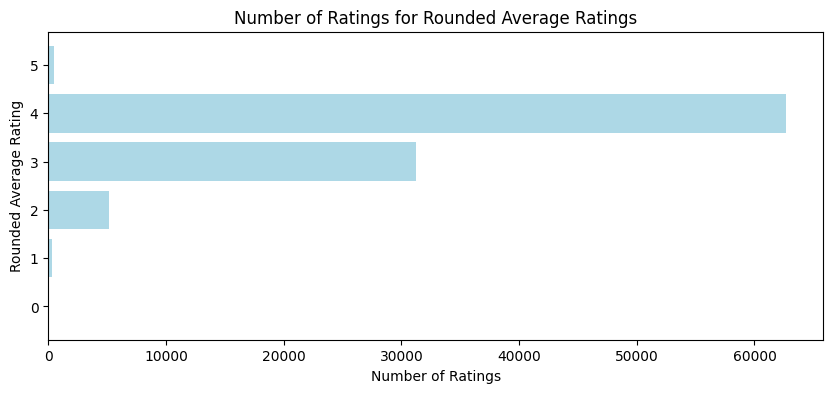

In [34]:
# Aggregate the counts by the rounded average rating
aggregated_counts = ratings_mean_count.groupby(ratings_mean_count['rating'].round())['rating_counts'].sum()

# Plotting
plt.figure(figsize=(10, 4))
plt.barh(aggregated_counts.index, aggregated_counts.values, color='lightblue')
plt.xlabel('Number of Ratings')
plt.ylabel('Rounded Average Rating')
plt.title('Number of Ratings for Rounded Average Ratings')
plt.show()

 **Above chart show the majority of the ratings are around 4 and 3**
 
The chart suggests that movies with average ratings of 4 and 3 are much more popular (in terms of the number of ratings received) than those with ratings of 2 or 5. This could indicate that movies with mid-range average ratings (3 and 4) tend to have wider viewership or broader appeal, while very highly rated (5) or lower-rated (2) movies receive fewer ratings.




In [36]:
ratings_mean_count = ratings_mean_count[(ratings_mean_count['rating'] > 3) & (ratings_mean_count['rating_counts'] > 100)]
ratings_mean_count


# An average rating greater than 3.
# More than 100 ratings.

,rating,rating_counts
title,,
2001: A Space Odyssey (1968),3.9,123
Airplane! (1980),3.8,106
Aladdin (1992),3.7,215
Alien (1979),4.0,127
Aliens (1986),3.9,125
...,...,...
While You Were Sleeping (1995),3.4,101
Who Framed Roger Rabbit? (1988),3.7,108
Willy Wonka & the Chocolate Factory (1971),3.8,148


In [37]:
ratings_mean_count = ratings_mean_count.sort_values(by= 'rating',ascending=False).head(10)
ratings_mean_count

,rating,rating_counts
title,,
"Godfather, The (1972)",4.5,200
"Shawshank Redemption, The (1994)",4.5,311
"Usual Suspects, The (1995)",4.4,201
"Godfather: Part II, The (1974)",4.4,135
Pulp Fiction (1994),4.3,324
Fargo (1996),4.3,224
One Flew Over the Cuckoo's Nest (1975),4.3,144
Schindler's List (1993),4.3,244
Taxi Driver (1976),4.2,118
